## Load libraries

In [1]:
from dotenv import dotenv_values
import numpy as np
import warnings
import os
import pandas as pd 
import matplotlib.pyplot as plt 
from HurstIndexSolver.HurstIndexSolver  import HurstIndexSolver
from HurstIndexSolver.fgn  import fgn
import yfinance as yf


### Load data and initialize variables

In [2]:
start_date = "2005-01-01"
end_date = "2022-12-31"

In [3]:

config = dotenv_values("../config/.env")

In [4]:
ALPHA_API = config["ALPHA_API"]

In [5]:
spy = yf.download("SPY", start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [47]:
spy.to_csv("../data/raw/spy.csv")

### Compute Hurst according to Zhang

In [6]:
HSolver = HurstIndexSolver()

In [7]:
""" N, H = 10000, 0.75
ts = fgn(N, H)
max_iter = int(np.ceil(N/5)) """

' N, H = 10000, 0.75\nts = fgn(N, H)\nmax_iter = int(np.ceil(N/5)) '

In [8]:
max_scale =len(spy)//9
HSolver.EstHurstLSSD(np.diff(spy["Close"].values), max_scale=max_scale)

0.39467779871834857

### Multifractal simulation

In [9]:
from MMAR.MMAR import MMAR 

In [10]:
mmar = MMAR(spy["Close"])

In [12]:
S0 = spy["Close"].iloc[-1]
simulation = mmar.get_MMAR_MC(S0)

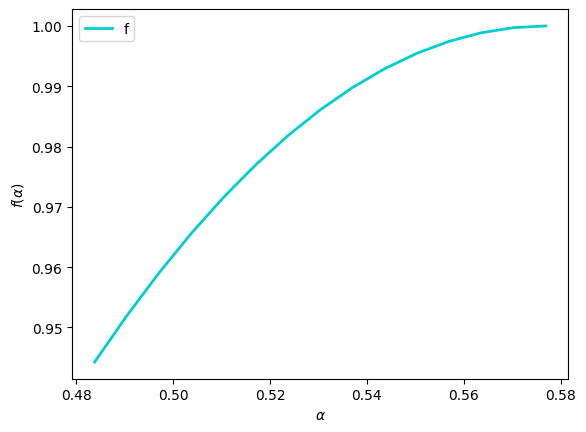

In [14]:
mmar.plot_alpha()

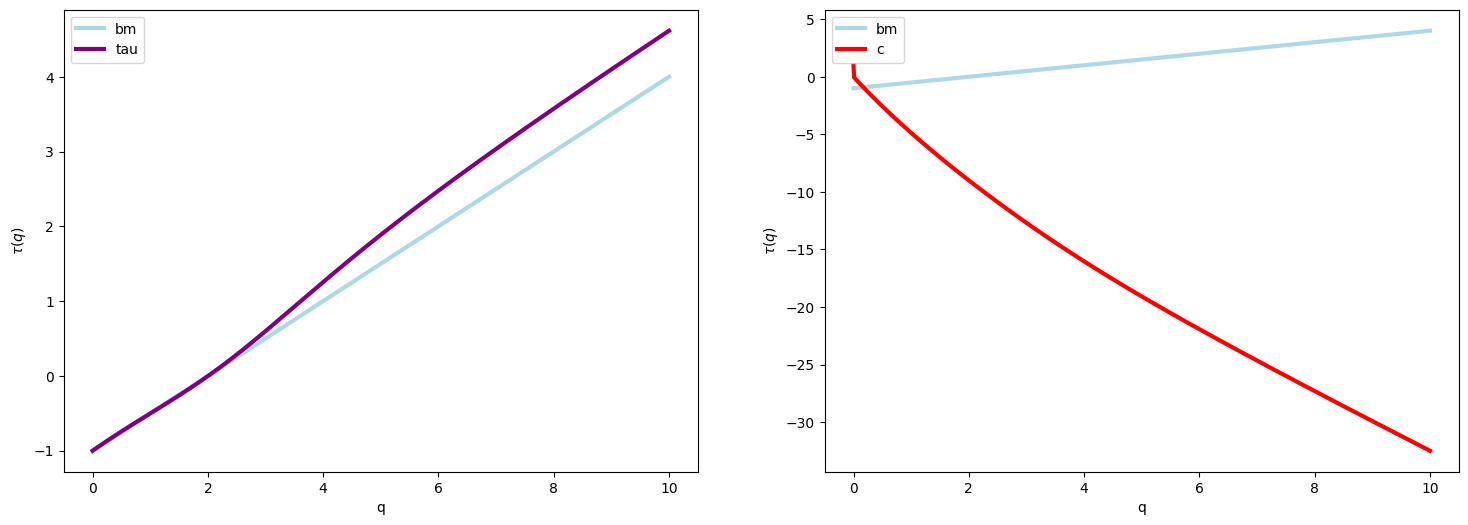

In [15]:
mmar.plot_scaling()

In [13]:
simulation.shape

(10000, 30)

In [20]:
mmar.H

0.49910167734142413

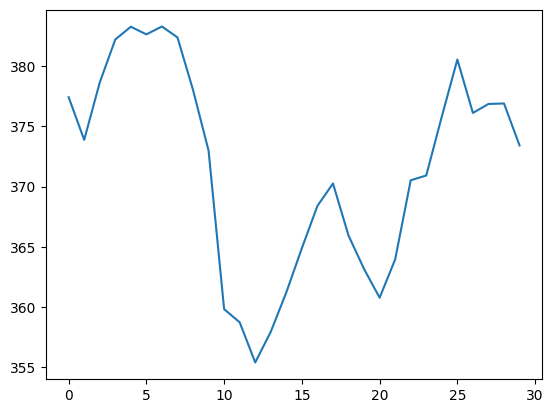

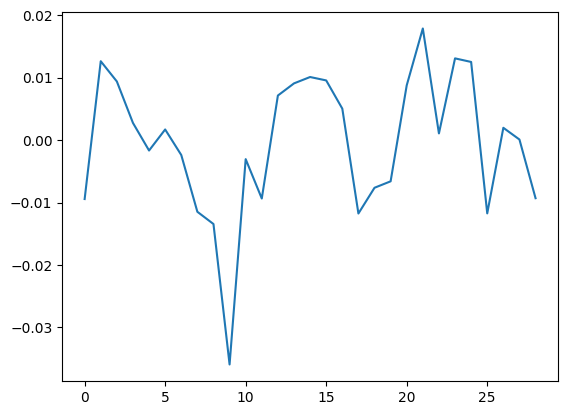

In [16]:
gmmar_sim = simulation[0,:]

plt.plot(gmmar_sim)
plt.show()

nmarr_sim = np.diff(np.log(gmmar_sim))
plt.plot(nmarr_sim)
plt.show()

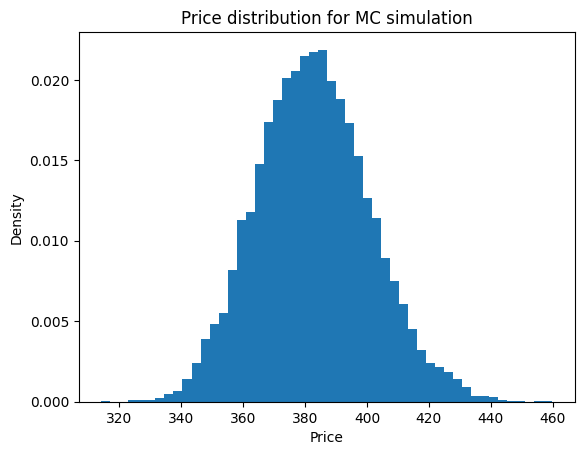

In [19]:
plt.hist(simulation[:,-1:], bins=50, density=True)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price distribution for MC simulation")
plt.show()

### Option chain

In [21]:
opt_chain = pd.read_csv("../data/raw/spy_eod_2018-7fpgd6/spy_eod_201801.txt")

In [22]:
opt_chain.head()

,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
0,1514926800,2018-01-02 16:00,2018-01-02,16.0,268.81,2018-01-03,1515013200,1.0,1.0,0.0,...,0.01,-0.00094,0.00035,0.00140,-0.00493,-0.00018,0.608320,8.000000,33.8,0.126
1,1514926800,2018-01-02 16:00,2018-01-02,16.0,268.81,2018-01-03,1515013200,1.0,1.0,0.0,...,0.01,-0.00152,0.00056,0.00099,-0.00504,-0.00018,0.519390,52.000000,28.8,0.107
2,1514926800,2018-01-02 16:00,2018-01-02,16.0,268.81,2018-01-03,1515013200,1.0,1.0,0.0,...,0.02,-0.00132,0.00061,0.00107,-0.00481,0.00000,0.475090,0.000000,26.3,0.098
3,1514926800,2018-01-02 16:00,2018-01-02,16.0,268.81,2018-01-03,1515013200,1.0,1.0,0.0,...,0.03,-0.00243,0.00071,0.00093,-0.00466,0.00000,0.430850,0.000000,23.8,0.089
4,1514926800,2018-01-02 16:00,2018-01-02,16.0,268.81,2018-01-03,1515013200,1.0,1.0,0.0,...,0.05,-0.00178,0.00090,0.00117,-0.00513,-0.00030,0.387350,0.000000,21.3,0.079


In [23]:
opt_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53109 entries, 0 to 53108
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   [QUOTE_UNIXTIME]        53109 non-null  int64  
 1    [QUOTE_READTIME]       53109 non-null  object 
 2    [QUOTE_DATE]           53109 non-null  object 
 3    [QUOTE_TIME_HOURS]     53109 non-null  float64
 4    [UNDERLYING_LAST]      53109 non-null  float64
 5    [EXPIRE_DATE]          53109 non-null  object 
 6    [EXPIRE_UNIX]          53109 non-null  int64  
 7    [DTE]                  53109 non-null  float64
 8    [C_DELTA]              53109 non-null  float64
 9    [C_GAMMA]              53109 non-null  float64
 10   [C_VEGA]               53109 non-null  float64
 11   [C_THETA]              53109 non-null  float64
 12   [C_RHO]                53109 non-null  float64
 13   [C_IV]                 53109 non-null  object 
 14   [C_VOLUME]             53109 non-null